## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

## Load Price Data

In [3]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    raw_data = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    raw_data = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)
raw_data.tail(10)
ticker_data = raw_data[["Open", "Close", "Low", "High", "Volume"]]
ticker_data.columns = ["open", "close", "low", "high", "volume"]
ticker_data

,open,close,low,high,volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.1,942.9,943.6,1812
2018-08-13 09:05:00,943.1,943.3,942.9,943.5,1323
2018-08-13 09:10:00,943.2,943.1,942.6,943.3,1207
2018-08-13 09:15:00,943.1,942.6,942.3,943.1,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1299.5,1298.3,1301.6,9058
2024-07-19 14:20:00,1299.1,1301.6,1295.3,1301.8,12762
2024-07-19 14:25:00,1302.4,1302.2,1300.1,1302.6,8096


In [4]:
#@title Raw Price
def cal_first_close(tick):
  if not tick.empty:
    return tick[0]


def cal_high(tick):
  tick = tick[100*tick.index.hour+tick.index.minute > 915]
  tick = tick[100*tick.index.hour+tick.index.minute < 1355]
  return tick.max()


def cal_low(tick):
  tick = tick[100*tick.index.hour+tick.index.minute > 915]
  tick = tick[100*tick.index.hour+tick.index.minute < 1355]
  return tick.min()


def cal_price(tick):
  tick = tick[100*tick.index.hour+tick.index.minute == 1355]
  if not tick.empty:
    return tick[0]

def cal_close(tick):
  tick = tick[100*tick.index.hour+tick.index.minute == 1425]
  if not tick.empty:
    return tick[0]

price = ticker_data
price['first_close'] = price.close
price['price'] = price.close
price = price.resample("D").agg({
    'first_close': cal_first_close,
    'high':cal_high,
    'low': cal_low,
    'price': cal_price,
    'close': cal_close
    })
raw = price.dropna()

In [5]:
price = raw.copy()
price.tail(10)

,first_close,high,low,price,close
Date,,,,,
2024-07-08,1316.1,1316.8,1305.6,1310.7,1312.0
2024-07-09,1315.1,1320.3,1304.5,1318.2,1319.5
2024-07-10,1319.6,1321.9,1313.6,1316.3,1310.3
2024-07-11,1314.9,1317.9,1310.2,1312.2,1306.6
2024-07-12,1304.6,1310.0,1300.8,1302.8,1299.5
2024-07-15,1302.9,1305.6,1298.7,1299.9,1297.0
2024-07-16,1301.6,1308.7,1301.0,1303.1,1301.8
2024-07-17,1308.2,1315.5,1301.7,1314.0,1296.9
2024-07-18,1303.9,1304.0,1291.6,1291.6,1297.7


In [6]:
price['percent'] = 100 * (price.price - price.close.shift(1)) / price.close.shift(1)
price['returns'] = (price.price - price.first_close) / (price.high - price.low)
price['return'] = 1000 * (price.close - price.price) / price.price
price.tail(10)

,first_close,high,low,price,close,percent,returns,return
Date,,,,,,,,
2024-07-08,1316.1,1316.8,1305.6,1310.7,1312.0,-0.417870,-0.482143,0.991836
2024-07-09,1315.1,1320.3,1304.5,1318.2,1319.5,0.472561,0.196203,0.986193
2024-07-10,1319.6,1321.9,1313.6,1316.3,1310.3,-0.242516,-0.397590,-4.558231
2024-07-11,1314.9,1317.9,1310.2,1312.2,1306.6,0.145005,-0.350649,-4.267642
2024-07-12,1304.6,1310.0,1300.8,1302.8,1299.5,-0.290831,-0.195652,-2.533006
2024-07-15,1302.9,1305.6,1298.7,1299.9,1297.0,0.030781,-0.434783,-2.230941
2024-07-16,1301.6,1308.7,1301.0,1303.1,1301.8,0.470316,0.194805,-0.997621
2024-07-17,1308.2,1315.5,1301.7,1314.0,1296.9,0.937164,0.420290,-13.013699
2024-07-18,1303.9,1304.0,1291.6,1291.6,1297.7,-0.408667,-0.991935,4.722824


In [7]:
price = price[price['return'] > -30]
price = price[price['return'] <  30]

In [8]:
pd.qcut(price.percent, 30)

Date
2018-08-13                  NaN
2018-08-14       (0.472, 0.583]
2018-08-15    (-0.149, -0.0798]
2018-08-16     (-0.875, -0.713]
2018-08-17        (0.195, 0.26]
                    ...        
2024-07-15     (-0.023, 0.0394]
2024-07-16       (0.395, 0.472]
2024-07-17       (0.907, 1.044]
2024-07-18     (-0.468, -0.372]
2024-07-19       (0.395, 0.472]
Name: percent, Length: 1479, dtype: category
Categories (30, interval[float64, right]): [(-7.2010000000000005, -2.484] < (-2.484, -1.472] < (-1.472, -1.094] < (-1.094, -0.875] ... (1.044, 1.263] < (1.263, 1.674] < (1.674, 2.217] < (2.217, 7.145]]

In [9]:
price['percent_group'] = pd.qcut(price.percent, 30)
price['returns_group'] = pd.qcut(price.returns, 30)
price[['percent_group', 'returns_group']]

,percent_group,returns_group
Date,,
2018-08-13,NaN,"(0.914, 1.032]"
2018-08-14,"(0.472, 0.583]","(0.683, 0.764]"
2018-08-15,"(-0.149, -0.0798]","(0.0396, 0.0944]"
2018-08-16,"(-0.875, -0.713]","(0.0944, 0.154]"
2018-08-17,"(0.195, 0.26]","(-0.889, -0.778]"
...,...,...
2024-07-15,"(-0.023, 0.0394]","(-0.454, -0.395]"
2024-07-16,"(0.395, 0.472]","(0.154, 0.22]"
2024-07-17,"(0.907, 1.044]","(0.397, 0.461]"


## Analysis

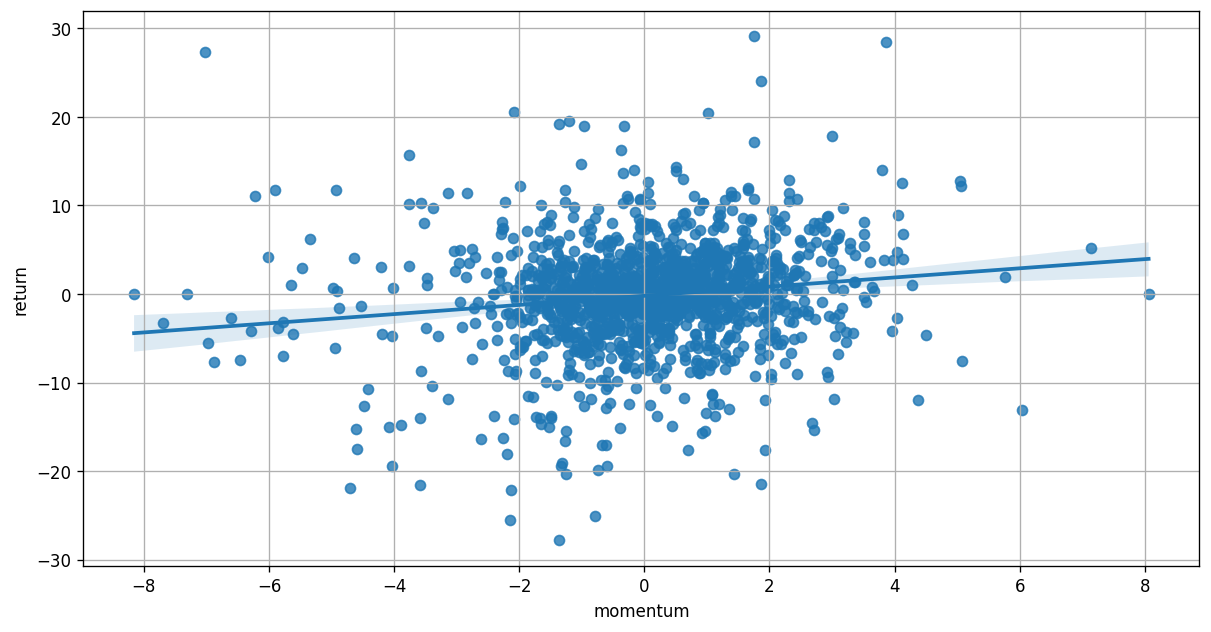

In [10]:
price['momentum'] = price.percent + price.returns
sns.regplot(x=price['momentum'], y=price['return'])
plt.grid(True)

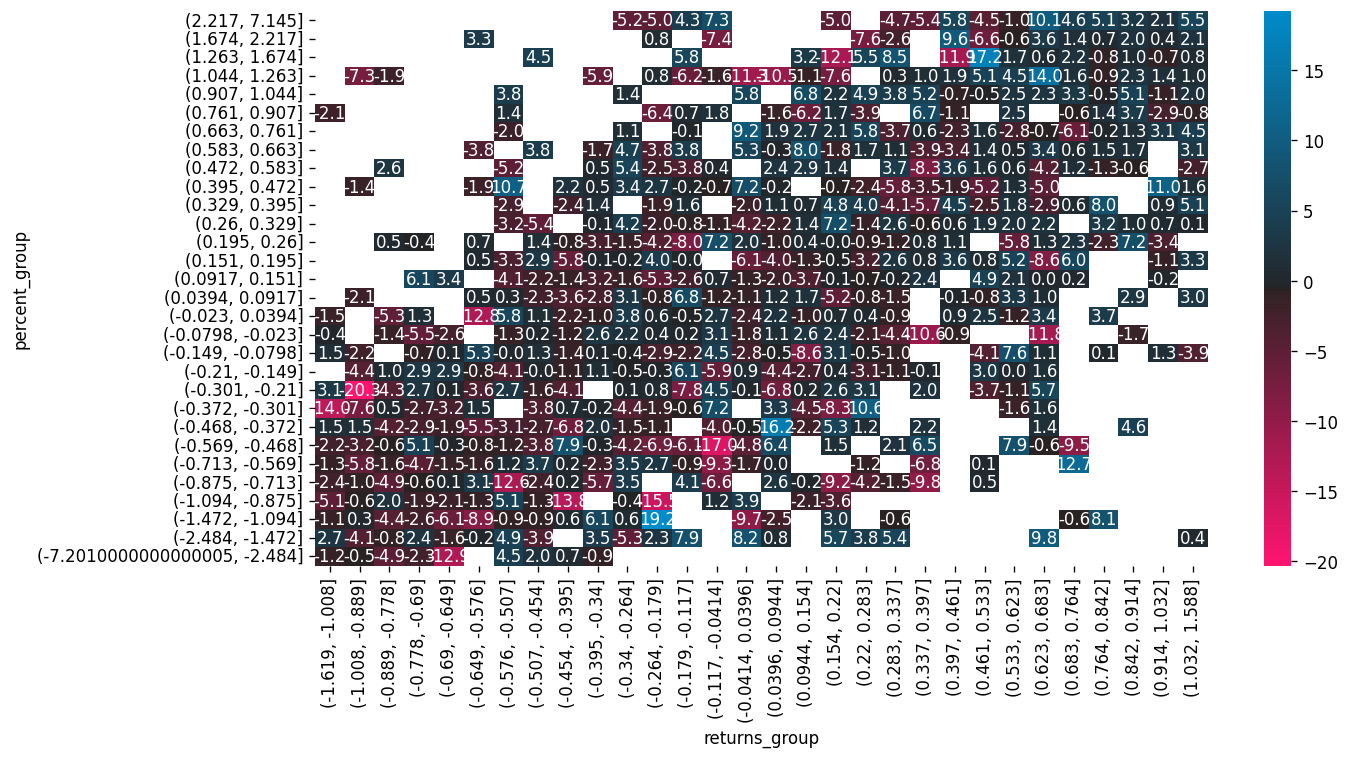

In [11]:
grpd = price.groupby(['percent_group', 'returns_group'])[['return']]
irs = grpd.mean().reset_index()
sns.heatmap(
    irs.pivot(index='percent_group', columns='returns_group', values='return').sort_index(ascending=False),
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f");

## Long

In [12]:
Long = price[price.percent > .26]
Long = Long[Long.returns > .39]
Long

,first_close,high,low,price,close,percent,returns,return,percent_group,returns_group,momentum
Date,,,,,,,,,,,
2018-08-14,954.9,958.6,952.1,959.5,960.1,0.565978,0.707692,0.625326,"(0.472, 0.583]","(0.683, 0.764]",1.273671
2018-08-21,944.5,950.8,944.5,950.1,954.7,0.571610,0.888889,4.841596,"(0.472, 0.583]","(0.842, 0.914]",1.460499
2018-08-23,957.0,959.9,955.8,962.6,961.0,0.785258,1.365854,-1.662165,"(0.761, 0.907]","(1.032, 1.588]",2.151112
2018-08-27,961.5,965.2,961.5,963.7,963.0,0.500574,0.594595,-0.726367,"(0.472, 0.583]","(0.533, 0.623]",1.095168
2018-09-07,934.6,942.6,930.5,941.3,944.8,0.630746,0.553719,3.718262,"(0.583, 0.663]","(0.533, 0.623]",1.184465
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,1303.1,1312.9,1301.6,1313.9,1328.4,0.435713,0.955752,11.035847,"(0.395, 0.472]","(0.914, 1.032]",1.391465
2024-06-18,1311.9,1319.7,1311.4,1321.4,1309.5,0.877930,1.144578,-9.005600,"(0.761, 0.907]","(1.032, 1.588]",2.022508
2024-07-02,1286.6,1299.0,1284.6,1297.1,1296.6,0.957347,0.729167,-0.385475,"(0.907, 1.044]","(0.683, 0.764]",1.686514


In [13]:
Long['tail'] = (Long.high - Long.price) / (Long.high - Long.first_close)
Long['tail_group'] = pd.qcut(Long['tail'], 15, duplicates='drop')
Long[['return', 'tail_group']].groupby(['tail_group']).mean()
Long

,first_close,high,low,price,close,percent,returns,return,percent_group,returns_group,momentum,tail,tail_group
Date,,,,,,,,,,,,,
2018-08-14,954.9,958.6,952.1,959.5,960.1,0.565978,0.707692,0.625326,"(0.472, 0.583]","(0.683, 0.764]",1.273671,-0.243243,"(-1.8339999999999999, -0.151]"
2018-08-21,944.5,950.8,944.5,950.1,954.7,0.571610,0.888889,4.841596,"(0.472, 0.583]","(0.842, 0.914]",1.460499,0.111111,"(0.11, 0.139]"
2018-08-23,957.0,959.9,955.8,962.6,961.0,0.785258,1.365854,-1.662165,"(0.761, 0.907]","(1.032, 1.588]",2.151112,-0.931034,"(-1.8339999999999999, -0.151]"
2018-08-27,961.5,965.2,961.5,963.7,963.0,0.500574,0.594595,-0.726367,"(0.472, 0.583]","(0.533, 0.623]",1.095168,0.405405,"(0.402, 0.5]"
2018-09-07,934.6,942.6,930.5,941.3,944.8,0.630746,0.553719,3.718262,"(0.583, 0.663]","(0.533, 0.623]",1.184465,0.162500,"(0.162, 0.191]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,1303.1,1312.9,1301.6,1313.9,1328.4,0.435713,0.955752,11.035847,"(0.395, 0.472]","(0.914, 1.032]",1.391465,-0.102041,"(-0.151, -0.0637]"
2024-06-18,1311.9,1319.7,1311.4,1321.4,1309.5,0.877930,1.144578,-9.005600,"(0.761, 0.907]","(1.032, 1.588]",2.022508,-0.217949,"(-1.8339999999999999, -0.151]"
2024-07-02,1286.6,1299.0,1284.6,1297.1,1296.6,0.957347,0.729167,-0.385475,"(0.907, 1.044]","(0.683, 0.764]",1.686514,0.153226,"(0.139, 0.162]"


In [14]:
Long['return'].sum()

446.8613712158956

In [15]:
this_month = Long[(Long.index > '2024-06-01 00:00:00') & (Long.index < '2024-06-30 15:00:00')]
this_month['return'].sum()

-0.20637149340488925

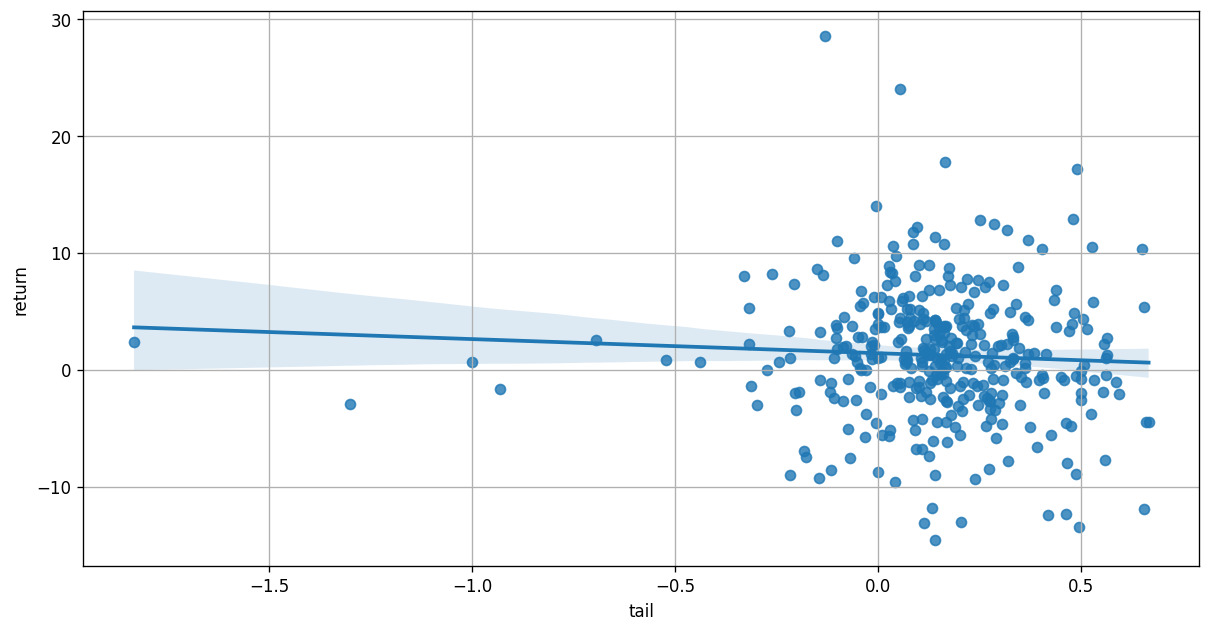

In [16]:
sns.regplot(x=Long['tail'], y=Long['return'])
plt.grid(True)

## Short

In [17]:
Short = price[price.percent < -.18]
Short = Short[Short.returns < -.39]

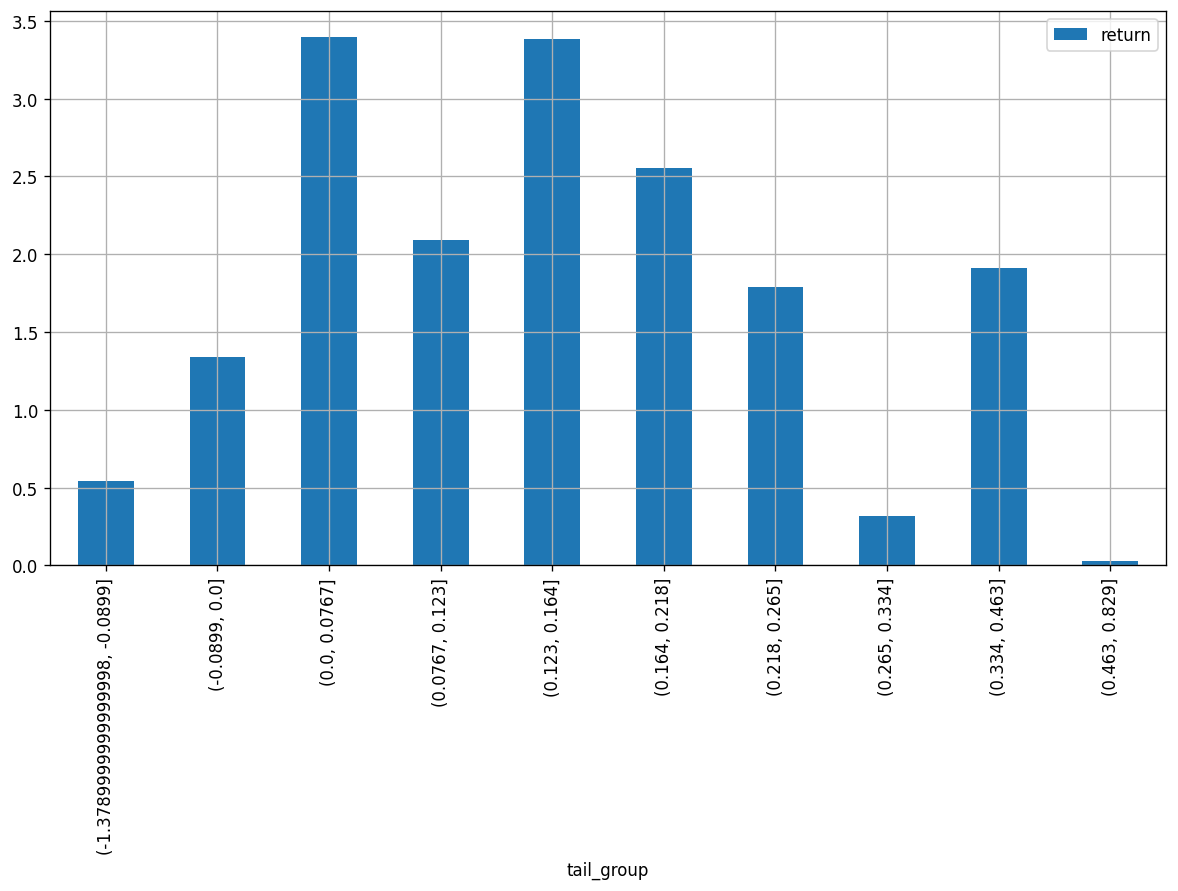

In [18]:
Short['tail'] = (Short.price - Short.low) / (Short.high - Short.low)
Short['tail_group'] = pd.qcut(Short['tail'], 10)
(-Short[['return', 'tail_group']].groupby(['tail_group']).mean()).plot.bar()
plt.grid(True)

In [19]:
Short

,first_close,high,low,price,close,percent,returns,return,percent_group,returns_group,momentum,tail,tail_group
Date,,,,,,,,,,,,,
2018-08-29,965.7,965.9,963.2,962.3,963.9,-0.372709,-1.259259,1.662683,"(-0.468, -0.372]","(-1.619, -1.008]",-1.631969,-0.333333,"(-1.3789999999999998, -0.0899]"
2018-09-05,952.7,954.4,945.6,947.4,942.5,-1.003135,-0.602273,-5.172050,"(-1.094, -0.875]","(-0.649, -0.576]",-1.605408,0.204545,"(0.164, 0.218]"
2018-09-06,945.0,945.8,936.6,935.6,935.4,-0.732095,-1.021739,-0.213767,"(-0.875, -0.713]","(-1.619, -1.008]",-1.753835,-0.108696,"(-1.3789999999999998, -0.0899]"
2018-09-10,943.5,944.8,936.3,936.1,938.0,-0.920830,-0.870588,2.029698,"(-1.094, -0.875]","(-0.889, -0.778]",-1.791418,-0.023529,"(-0.0899, 0.0]"
2018-10-05,990.4,990.8,985.3,987.1,982.7,-0.182020,-0.600000,-4.457502,"(-0.21, -0.149]","(-0.649, -0.576]",-0.782020,0.327273,"(0.265, 0.334]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,1314.9,1317.3,1290.4,1296.8,1287.1,-1.571157,-0.672862,-7.479951,"(-2.484, -1.472]","(-0.69, -0.649]",-2.244020,0.237918,"(0.218, 0.265]"
2024-06-28,1292.0,1292.2,1281.2,1283.9,1277.9,-0.457435,-0.736364,-4.673261,"(-0.468, -0.372]","(-0.778, -0.69]",-1.193799,0.245455,"(0.218, 0.265]"
2024-07-08,1316.1,1316.8,1305.6,1310.7,1312.0,-0.417870,-0.482143,0.991836,"(-0.468, -0.372]","(-0.507, -0.454]",-0.900012,0.455357,"(0.334, 0.463]"


In [20]:
abs(Short['return'].sum())

578.8579602562834

In [21]:
short_this_month = Short[(Short.index > '2024-06-01 00:00:00') & (Short.index < '2024-06-30 15:00:00')]
short_this_month['return'].sum()

-9.346949324318242

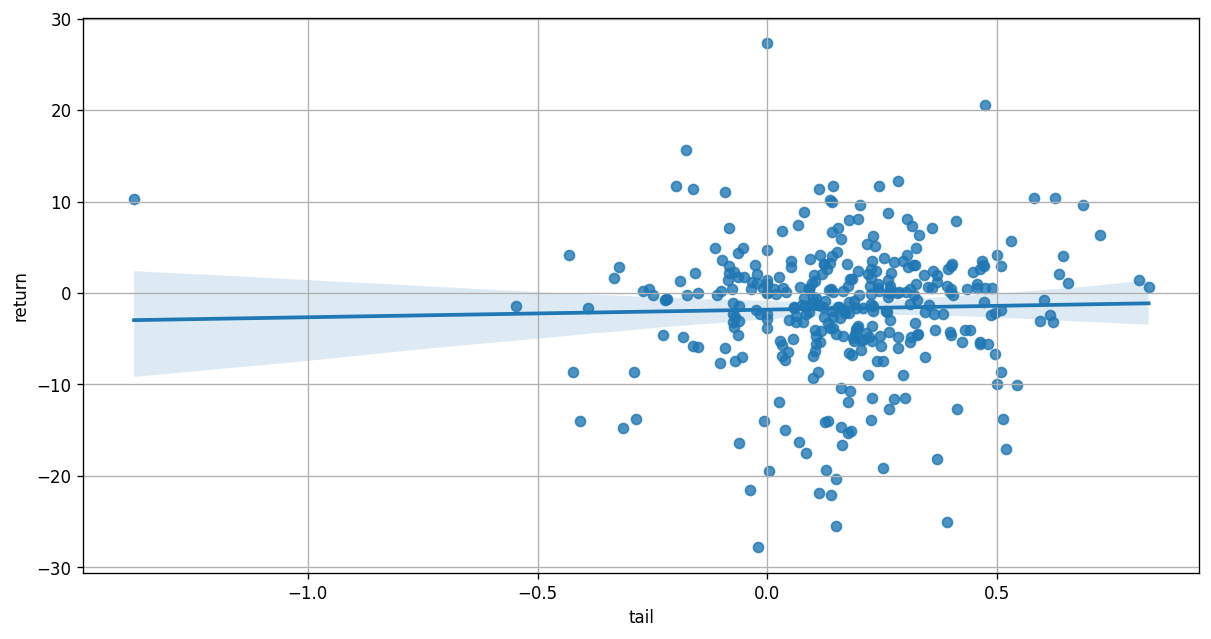

In [22]:
sns.regplot(x=Short['tail'], y=Short['return'])
plt.grid(True)